## Importing Some Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.matlib
import matplotlib.pyplot as plt
numpy.random.seed(42)

## Creating dataset

In [2]:
c1 = [2,3]# Cluster center for class 1 data
c2 = [10,11]# Cluster center for class 2 data
no = 50 # No of samples in a class
class1 = np.matlib.repmat(c1,no,1) + np.random.randn(no,len(c1))
class2 = np.matlib.repmat(c2, no,1)+ np.random.randn(no,len(c2))
D = np.append(class1,class2,axis =0)
Data = np.concatenate((D, np.ones((2*no,1))),axis = 1)
c1_label = np.ones((no,1))
c2_label = -1*np.ones((no,1))
label = np.concatenate((c1_label,c2_label),axis = 0)
Data = Data.T
y = label.T# True label

## Plotting data

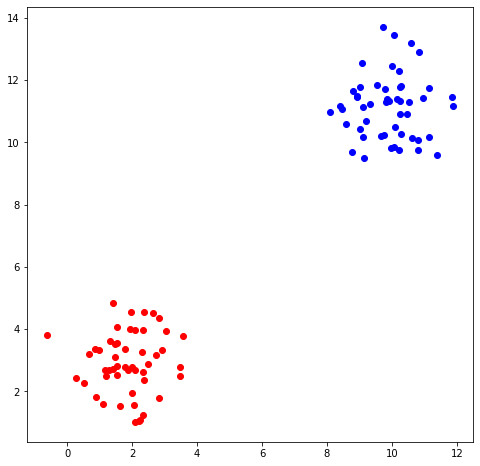

In [3]:
plt.figure(figsize = (8,8))
plt.plot(class1[:,0],class1[:,1],'ro',class2[:,0],class2[:,1],'bo')
plt.show()

## Validation data


In [4]:
v1 = [5,4]# Cluster center for class1 data of validation data set
v2 = [7,12]# Cluster center for class 2 data of validation data set
v_no = 30# No of samples in a class
v_class1 = np.matlib.repmat(v1,v_no,1) + np.random.randn(v_no,len(v1))
v_class2 = np.matlib.repmat(v2, v_no,1)+ np.random.randn(v_no,len(v2))
v_D = np.append(v_class1,v_class2,axis =0)
v_Data = np.concatenate((v_D, np.ones((2*v_no,1))),axis = 1)
v_c1_label = np.ones((v_no,1))
v_c2_label = -1*np.ones((v_no,1))
v_label = np.concatenate((v_c1_label,v_c2_label),axis = 0)
v_Data = v_Data.T
v_y = v_label.T# Test label

## Plotting validation data

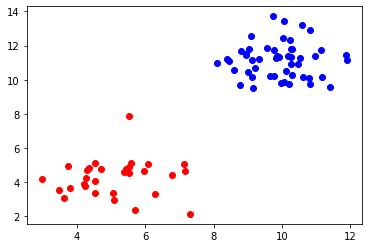

In [5]:
plt.plot(v_class1[:,0],v_class1[:,1],'ro',class2[:,0],class2[:,1],'bo')
plt.show()

## The activation function: sigmoid

In [6]:
def sigmoid(x):
    a  = 1/(1+np.exp(-x))
    return a

def prediction(w, Data):
    pred = []
    z = np.dot(w,Data)
    a = sigmoid(z)
    for i in range(0,len(a[0])):
        if (a[0][i] > 0.5): 
            pred.append(1)
        elif (a[0][i] <= 0.5):
            pred.append(-1)
    return pred

## Training

In [30]:
learning_rate = 0.01
w = np.random.randn(1,3)
for i in range(1,1500):
    
    z = np.dot(w,Data)
    y_pred = prediction(w, Data)
    val = -np.multiply(y,z)
    J = np.sum(np.log(1+np.exp(val)))
    num = -np.multiply(y,np.exp(val))
    den = 1+np.exp(val)
    f = num/den
    gradJ = np.dot(Data,f.T)
    w = w - learning_rate*gradJ.T

## Classifier


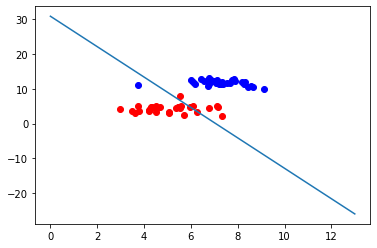

In [31]:
domain =  np.linspace(0,13,100)
h_x = -(w[0,0]/w[0,1])*domain - (w[0,2]/w[0,1])

plt.plot(v_class1[:,0],v_class1[:,1],'ro',v_class2[:,0],v_class2[:,1],'bo')
plt.plot(domain,h_x)
plt.show()

The Logistic Regression has successfully learnt to categorize the given dataset